# Optimizer

SGD
- $W \leftarrow W - \eta \frac{\partial L}{\partial W}$
- 비등방성 함수(방향에 따라 기울기가 달라지는 함수)에서 탐색 경로가 비효율적임

In [1]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr
    
  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

Momentum
- $v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W}$
- $W \leftarrow W + v$
- x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문

In [2]:
import numpy as np

class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None
    
  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
    
    for key in params.keys:
      self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
      params[key] += self.v[key]

AdaGrad
- 학습률 감소(learning rate decay): 학습을 진해앟면서 학습률을 점차 줄여나가는 방법
- 각각의 매개변수에 맞춤형 값을 만들어 줌. 
- 적응적(adaptive)으로 학습률을 조정하면서 학습을 진행
- $h \leftarrow h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$
- $W \leftarrow W - \eta \frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}$

In [ ]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None
    
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, value in params.items():
        self.h[key] = np.zeros_like(value)
        
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

RMSProp
- AdaGrad와 같은 원리. 
- AdaGrad에서 학습하다보면 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않게 되는 문제를 해결하기 위함
- 모든 기울기를 균일하게 더하는게 아닌, 지수이동평균을 이용.
- $h \leftarrow (1-\rho)h + \rho \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W}$
- $W \leftarrow W - \eta \frac{1}{\sqrt{h}}\frac{\partial L}{\partial W}$

In [ ]:
class RMSProp:
  def __init__(self, lr=0.01, rho=0.5):
    self.lr = lr
    self.rho = rho
    self.h = None
    
    
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, value in params.items():
        self.h[key] = np.zeros_like(value)
        
    for key in params.keys():
      self.h[key] = (1 - self.rho) * self.h[key] + self.rho * grads[key] * grads[key]
      params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

Adam
- Momentum + AdaGrad
- 하이퍼파라미터의 '편향 보정'이 진행됨
- $v \leftarrow (1-\beta_1) * \frac{\partial L}{\partial W} + \beta_1 * v $ 
- $h \leftarrow (1-\beta_2) * \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} + \beta_2 * h $ 
- $W \leftarrow W - \alpha \frac{v}{\sqrt{h}}$
- $\alpha \leftarrow \eta * \frac{1.0 - \sqrt{1.0 - \beta_2 ** i}}{1.0 -\beta_1 ** i}$

In [ ]:
class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.v = None
        self.h = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v, self.h = {}, {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                self.h[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.v[key] = self.beta1*self.v[key] + (1-self.beta1)*grads[key]
            #self.h[key] = self.beta2*self.h[key] + (1-self.beta2)*(grads[key]**2)
            self.v[key] += (1 - self.beta1) * (grads[key] - self.v[key])
            self.h[key] += (1 - self.beta2) * (grads[key]**2 - self.h[key])
            
            params[key] -= lr_t * self.v[key] / (np.sqrt(self.h[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.v[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.h[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

# Weight Initial Value 

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def test(std, activation_func=sigmoid):
  x = np.random.randn(1000, 100)
  node_num = 100
  hidden_layer_size = 5
  activations = {}

  for i in range(hidden_layer_size):
    if i != 0:
      x = activations[i-1]
      
    w = np.random.randn(node_num, node_num) * std
    a = np.dot(x, w)
    z = activation_func(a)
    activations[i] = z
    
  
  plt.figure(figsize=(20, 10))

  for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if activation_func == tanh:
      plt.hist(a.flatten(), 30, range=(-1, 1))
    else:
      plt.hist(a.flatten(), 30, range=(0, 1))

  plt.show()

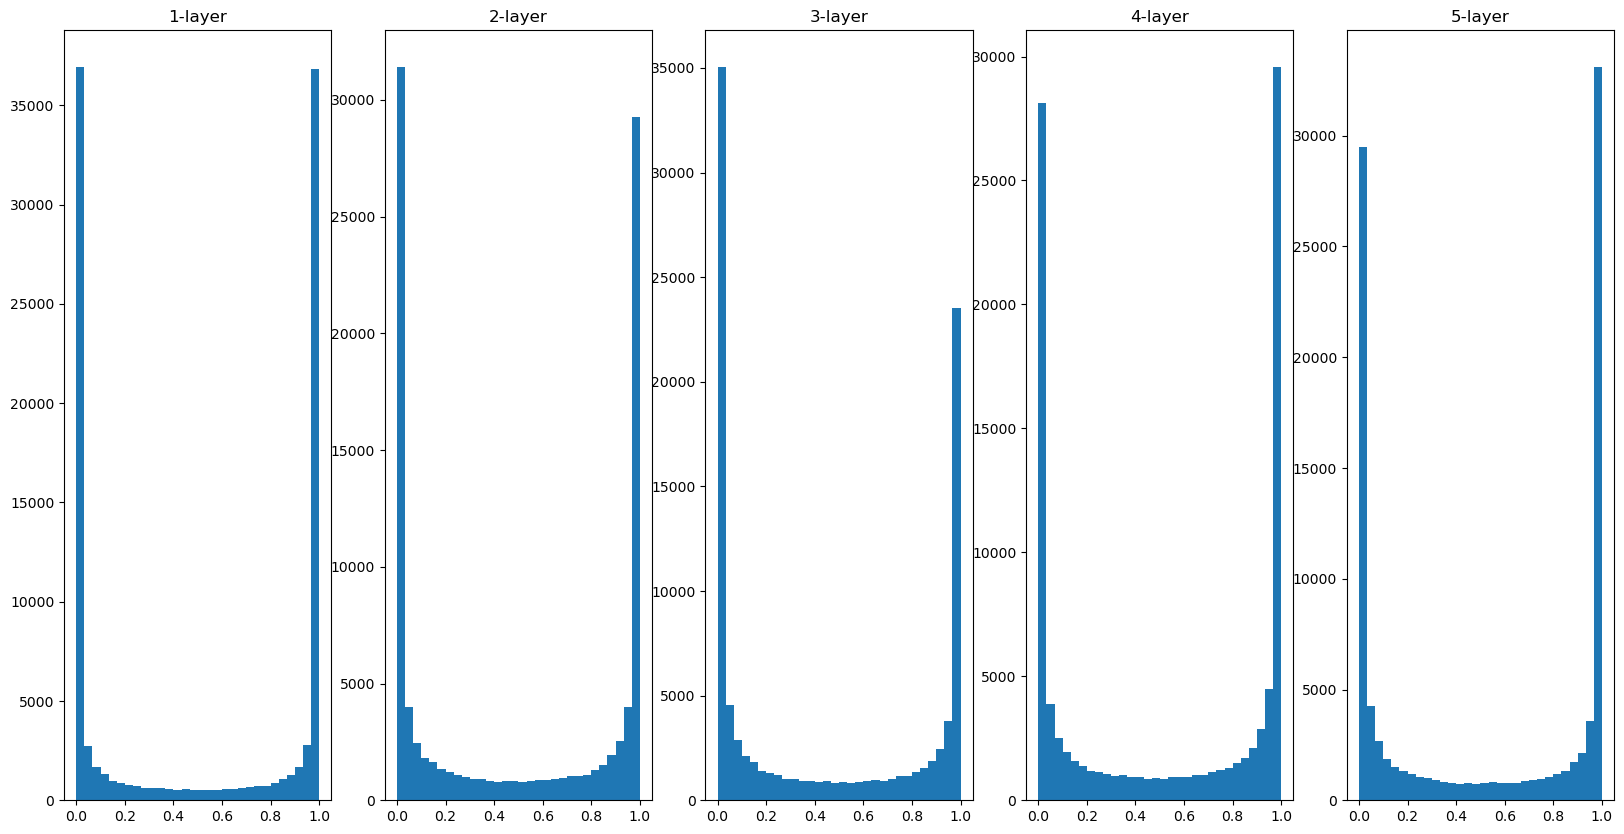

In [18]:
test(std=1)
# 기울기 소실이 일어남
# -> sigmoid 함수를 활성화함수로 사용했을 때의 문제

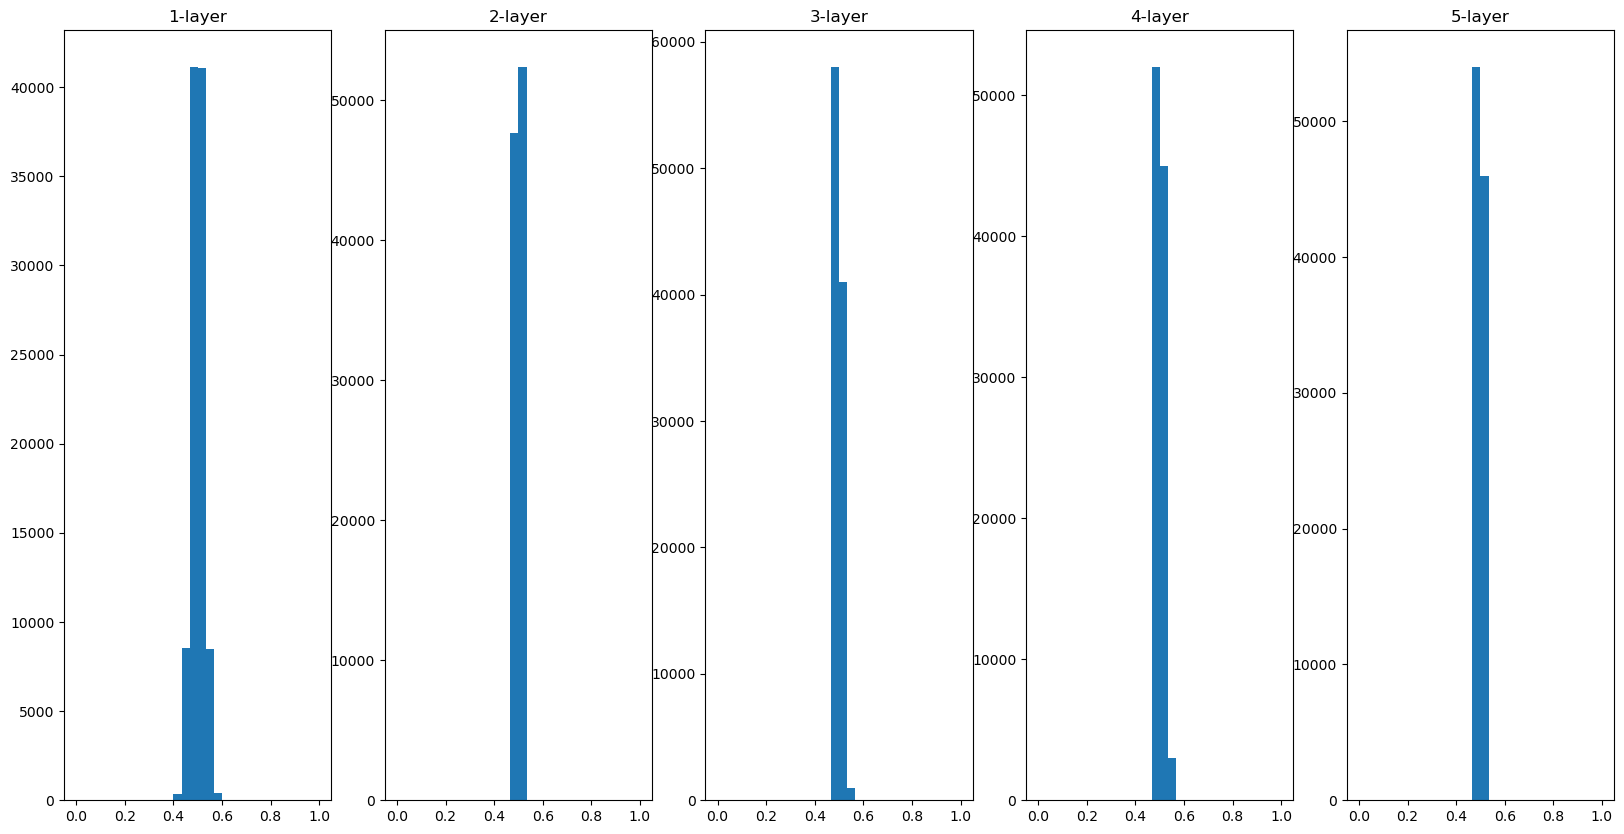

In [48]:
test(std=0.01)
# 기울기 소실 문제는 일어나지 않았으나 활성화값들이 치우쳐져 있다.
# -> 표현력을 제한하는 문제.

Xavier 
- 선형 활성화함수 일 때 (sigmoid or tanh)
- $std=\sqrt{\frac{1}{n}}$ , n=전층 노드의 개수

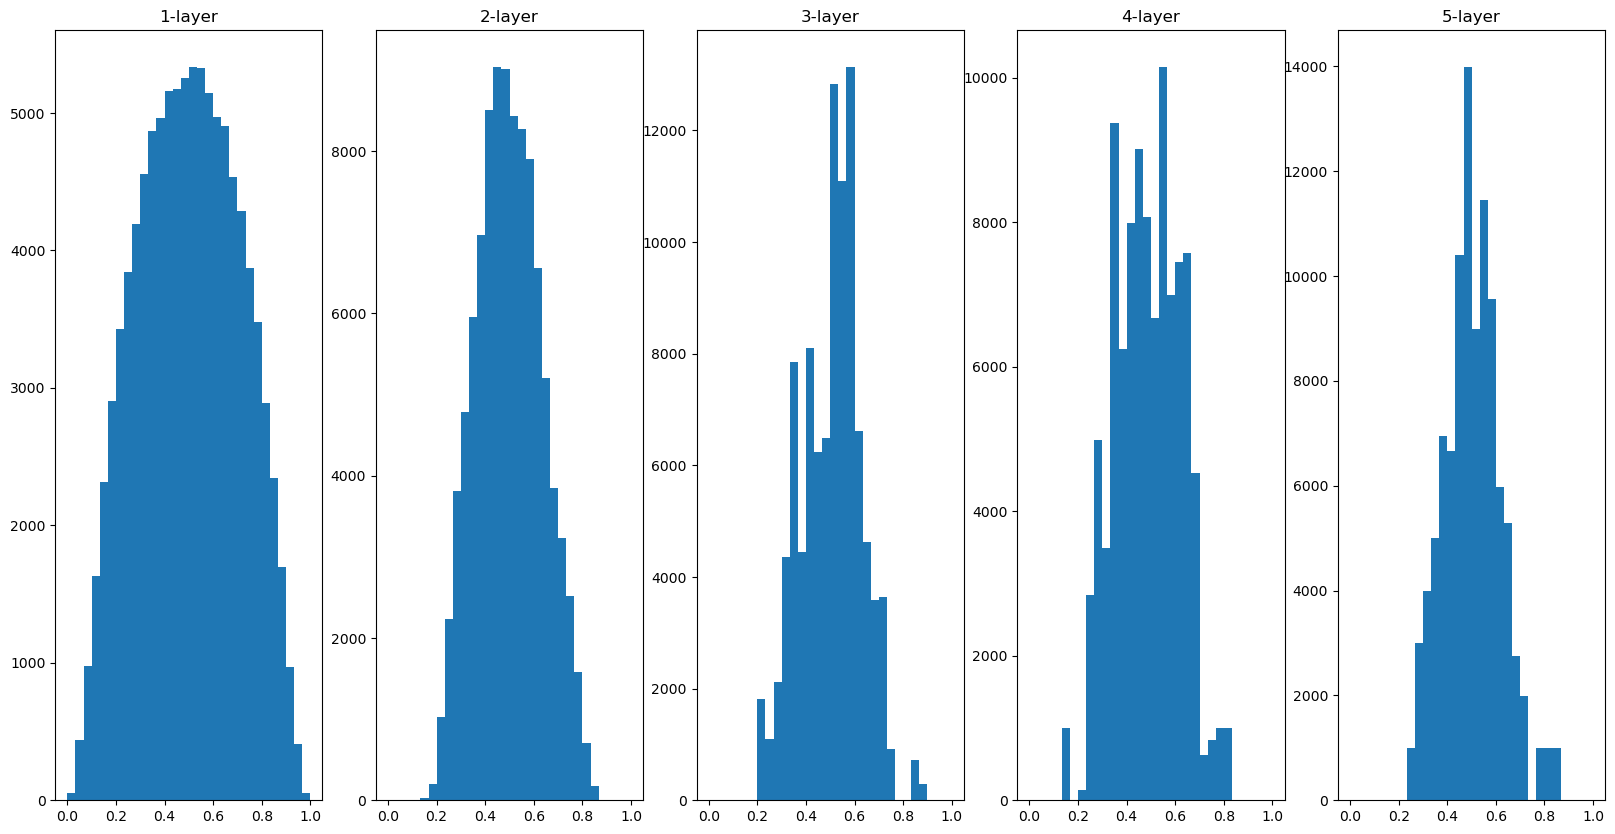

In [23]:
# Xavier 초깃값
# std: 1 / sqrt(앞 층 노드 수)
test(1 / np.sqrt(100), activation=sigmoid)

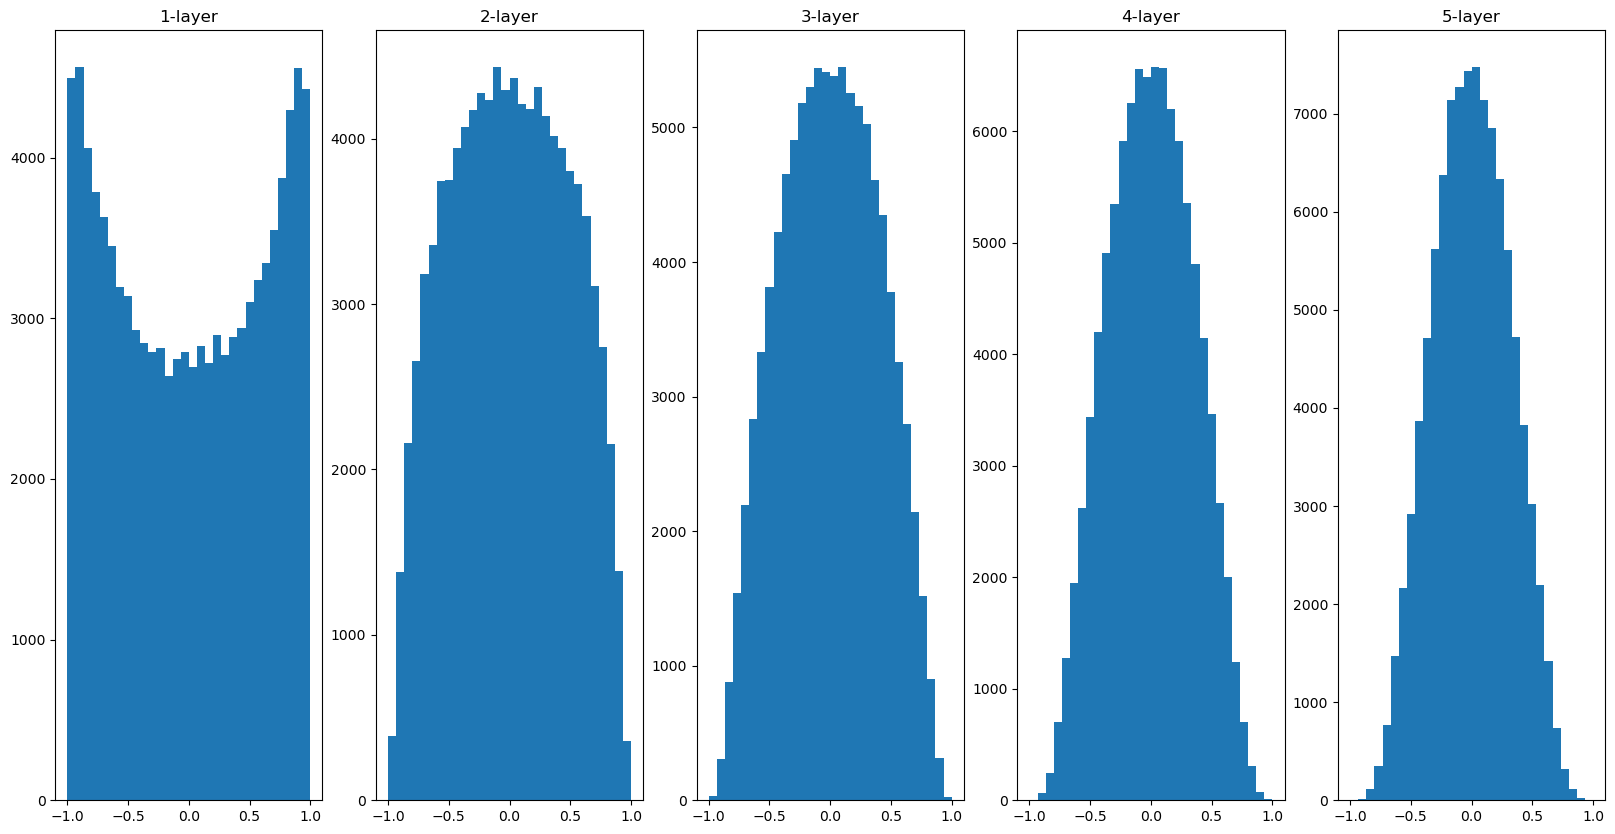

In [45]:
test(1 / np.sqrt(100), activation_func=tanh)

He
- ReLU에 특화됨
- std=$\sqrt{\frac{2}{n}}$

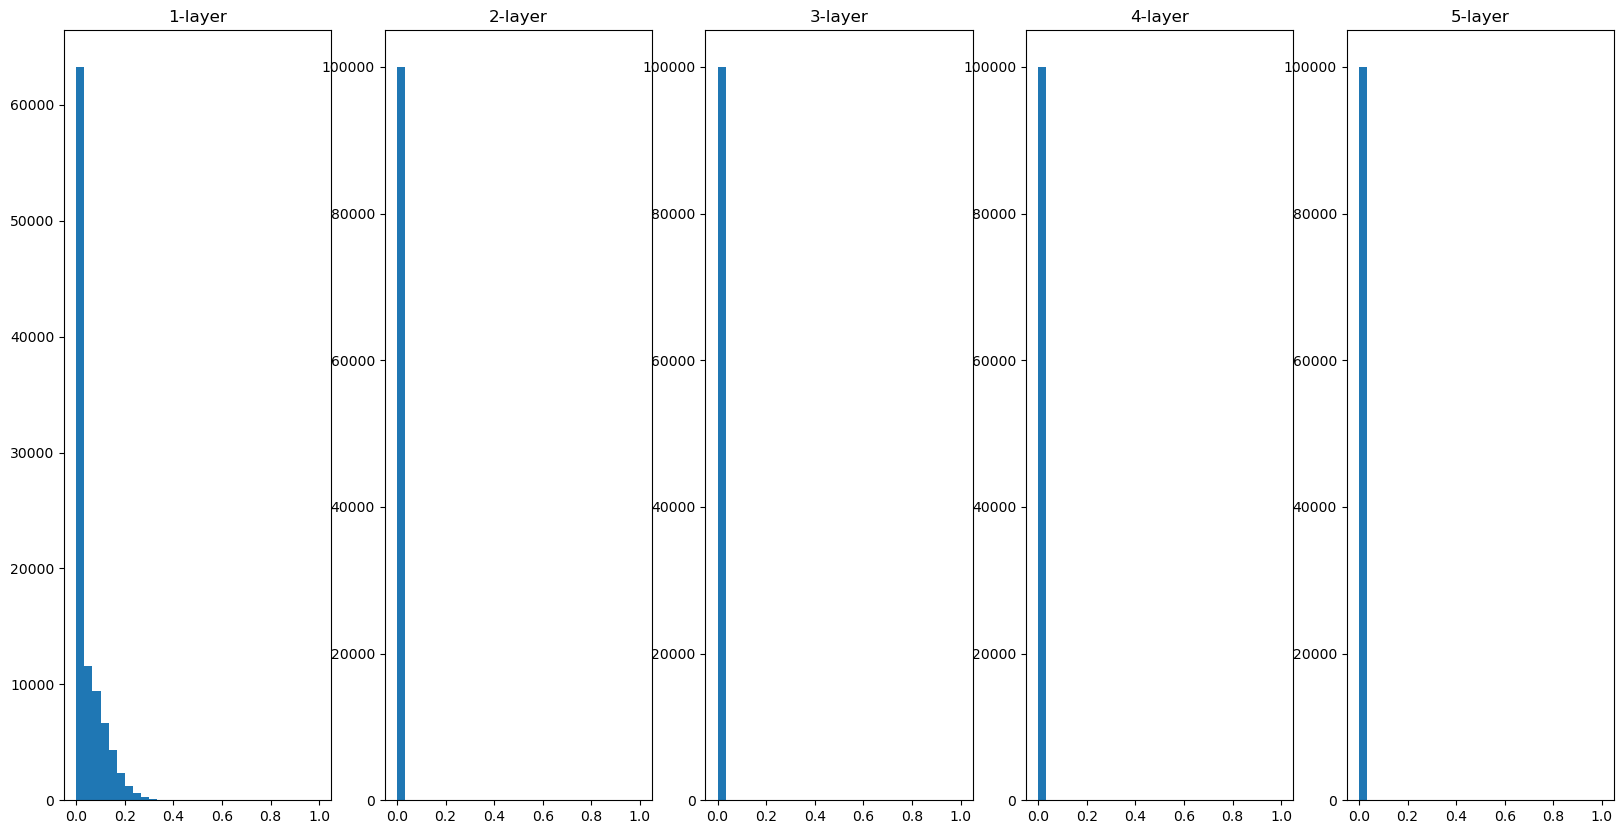

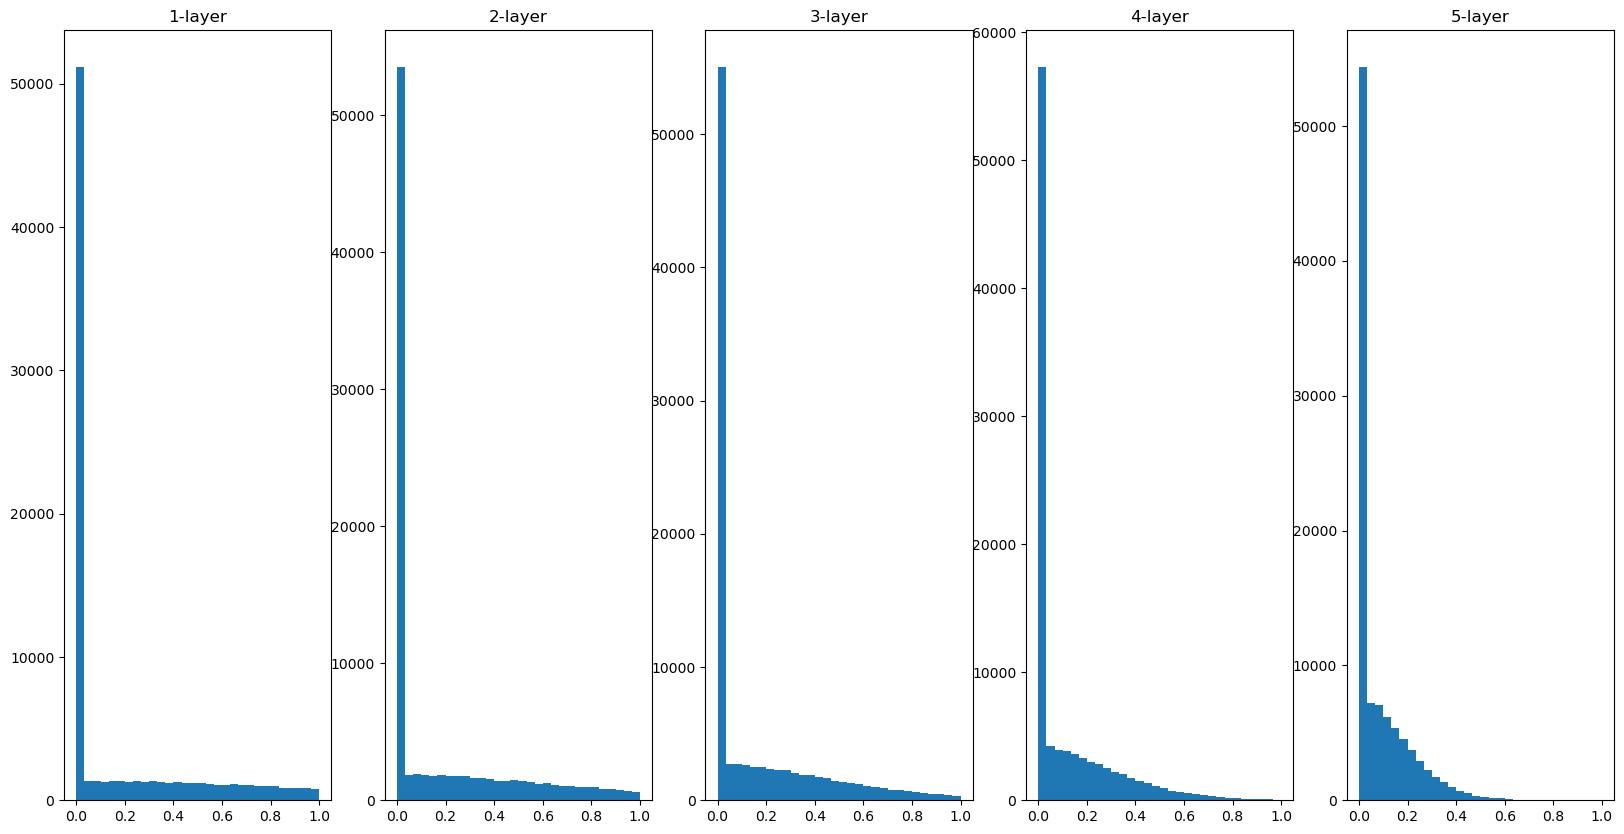

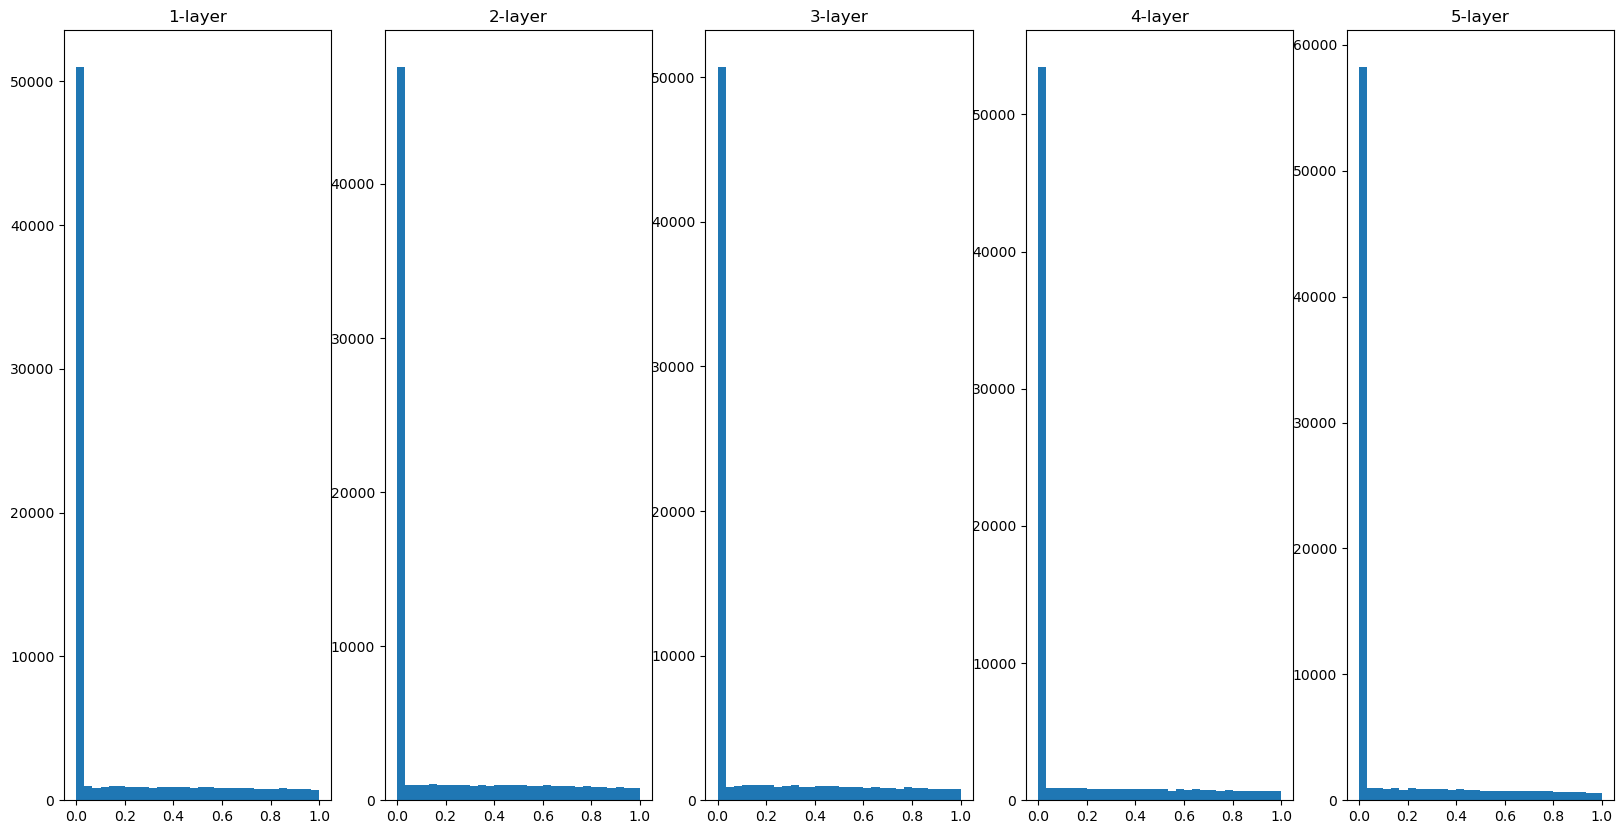

In [51]:
# Xavier 초기값은 활성화 함수가 선형인 것을 전제
# ReLU에 특화된 초기값 -> He 초기값
# 표준편차 = sqrt(2/n) , 음의영역이 0이라서 더 넓게 분포 시키기 위해
def ReLU(x):
  return np.maximum(0, x)


test(0.01, ReLU)
test(1 / np.sqrt(100), ReLU) # Xavier
test(np.sqrt(2 / 100), ReLU) # He


# Batch Normalization
- 장점
  - 학습을 빨리 진행할 수 있다.
  - 초기값에 크게 의존하지 않는다.
  - 오버피팅을 억제한다.
- 각 층에서의 활성화값이 적당히 분포되도록 조정하는 것
  - 평균이 0, 분산이 1이 되도록 정규화
  - $\mu_B \leftarrow \frac{1}{m}\sum_{i=1}^m x_i$
  - $\sigma_B^2 \leftarrow \frac{1}{m}\sum_{i=1}^m (x_i-\mu_B)^2$
  - $\hat x_i \leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}$
- 정규화된 데이터에 고유한 확대(scale)와 이동(shift) 변환을 수행
  - $ y_i \leftarrow \gamma \hat x_i +  \beta$
  - 처음에는 $\gamma = 1, \beta =0 $ 부터 시작하고 학습하면서 적합한 값으로 조정해나감

# For well-fitting

Overfitting
- 모델이 복잡하거나 ( 파라미터의 수가 많고 표현력이 높은 모델)
- 훈련 데이터가 적거나

In [52]:
import sys
sys.path.append('../modules/')
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train =  x_train[:300]
t_train = t_train[:300]

가중치 감소 (weight decay)
- 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문에

드롭아웃 (Dropout)
- 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려위진다.
- 뉴런을 임의로 삭제하면서 학습하는 방법
- 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 시험 때는 모든 뉴런에 신호를 전달
  - 시험 때는 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력 
- 앙상블 학습과 비슷. 
  - 매번 다른 모델을 학습시키는 것으로 해석 가능
  - 출력 떄는 평균을 내는 것과 같다.

In [53]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None
    
  def forward(self, x, train_flg=True):
    if train_flg:
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
    
  def backward(self, dout):
    return dout * self.mask

In [56]:
np.random.rand(5, 5) > 0.5

array([[ True, False, False,  True,  True],
       [ True, False, False,  True,  True],
       [ True,  True, False, False,  True],
       [ True, False, False,  True, False],
       [ True, False, False,  True,  True]])

# Hyperparameter
- hyper parameter 
  - 각 층의 뉴런의 수
  - 배치 크기
  - 학습률
  - 가중치 감소
- grid search 같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 좋은 결과를 낸다.
  - 최종 정확도에 미치는 영향력이 하이퍼파라미터마다 다르기 때문에
- 대략적으로 지정하는게 효과적
  - 10의 거듭제곱 단위로 범위 지정. log scale.
- 단계
  - 0단계
    - 하이퍼파라미터 값의 범위를 설정
  - 1단계
    - 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출
  - 2단계
    - 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, 검증 데이터로 정확로를 평가 (에폭 단위 작게)
  - 3단계
    - 1단계와 2단계를 특정 횟수 반복하며, 그 정확도의 결과를 보고 범위를 좁힘

베이브 최적화 Bayesian Optimization
- Bayes`theorem을 중심으로 한 수학이론을 구사하여 더 엄밀하고 효율적으로 최적화를 수행